## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

np.random.seed(88)

In [211]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [212]:
light = pd.read_csv("datasets/st1/michelson_speed_of_light.csv")
light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,5-Jun,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.1,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.5,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [213]:
speed = light["velocity of light in air (km/s)"]
speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

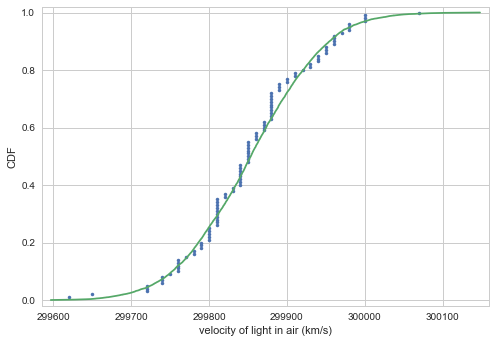

In [214]:
mean = np.mean(speed)
std = np.std(speed)

samples = np.random.normal(mean, std, size = 10000)

x, y = ecdf(speed)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.plot(x_theory, y_theory)

_ = plt.xlabel("velocity of light in air (km/s)")
_ = plt.ylabel("CDF")

plt.margins(0.02)
plt.show()

Optimal parameters are parameter values that bring the model in closest agreement with the data.

### Linear regression by least squares

* Least squares: The process of finding the parameters for which the sum of the squares of the residuals is minimal.

In [215]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [216]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

In [217]:
slope, intercept = np.polyfit(total_votes, dem_share, 1)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 3.37055368645e-05
Intercept: 40.8087905358


In [218]:
litfert = pd.read_csv("datasets/st2/female_literacy_fertility.csv")

In [219]:
litfert["illiteracy"] = 100 - litfert["female literacy"]
litfert.head()

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


In [220]:
illiteracy = litfert["illiteracy"]
fertility = litfert["fertility"]

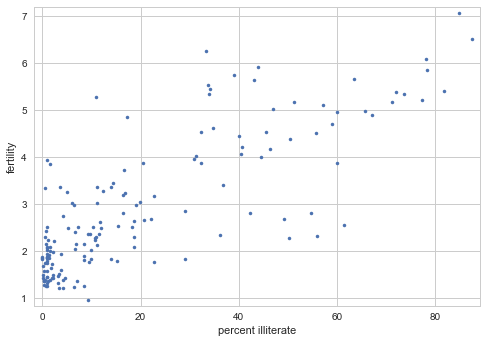

In [221]:
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")

plt.margins(0.02)

plt.show()

In [222]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [223]:
print(pearson_r(illiteracy, fertility))

0.804132402682


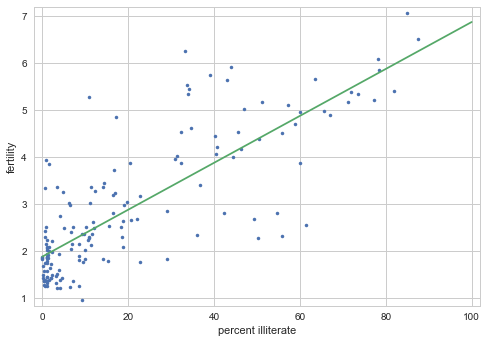

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


In [224]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

## How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares).

Plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

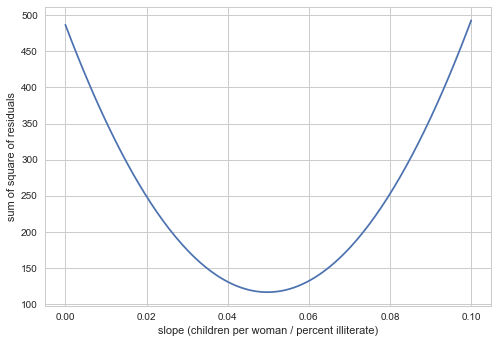

In [225]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200) # slopes

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. 

This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. 

### Bootstrapping

* The use of resampled data to perform statistical inference. Sampling with replacement. 
* Each resampled array is called a bootstrampped sample. 
* A bootstrap replicate is a statistic computed from a resampled array. 

In [226]:
data = [1, 2, 3, 4, 5]
np.random.choice(data, size = 5)

array([1, 4, 2, 4, 3])

In [227]:
bs_sample = np.random.choice(speed, size = 100)

In [228]:
np.mean(bs_sample)

299844.0

In [229]:
np.median(bs_sample)

299840.0

In [230]:
np.std(bs_sample)

74.16198487095663

In [231]:
def bootstrap_replicate_1d(data, func):
    # generate bootstrap replicate of 1-dimensional data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [232]:
bootstrap_replicate_1d(speed, np.mean)

299848.90000000002

In [233]:
bootstrap_replicate_1d(speed, np.std)

77.335308882812384

In [234]:
bootstrap_replicate_1d(speed, np.median)

299850.0

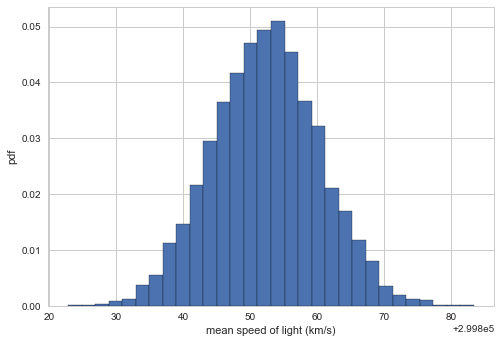

In [235]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(speed, np.mean)
    
_ = plt.hist(bs_replicates, bins = 30, normed = True)
_ = plt.xlabel("mean speed of light (km/s)")
_ = plt.ylabel("pdf")
plt.show()

### Confidence interval of a statistic

If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval. 

In [236]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval
conf_int

array([ 299837.,  299868.])

In [237]:
def draw_bs_reps(data, func, size = 1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Here, we'll compute the bootstrap estimate of the probability distribution function of the mean speed of light. This is a probabilistic estimate of the mean. 

SEM: 7.86145024789
Bootstrap Std: 7.79611361045


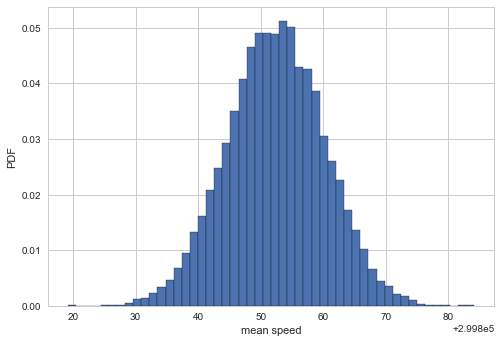

In [238]:
# take 10,000 bootstrap replicates of the mean:
bs_replicates = draw_bs_reps(speed, np.mean, size = 10000)

# compute and print SEM
# The standard deviation of this distribution, 
# called the standard error of the mean, or SEM, is given 
# by the standard deviation of the data divided by the 
# square root of the number of data points.
sem = np.std(speed) / np.sqrt(len(speed))
print("SEM:", sem)

# compute the std of the bootstrap reps
bs_std = np.std(bs_replicates)
print("Bootstrap Std:", bs_std)

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("mean speed")
_ = plt.ylabel("PDF")

plt.show()

Notice that the SEM that we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

#### Confidence intervals

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

In [239]:
np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval

array([ 299837.1,  299867.5])

### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: we can always take bootstrap replicates!

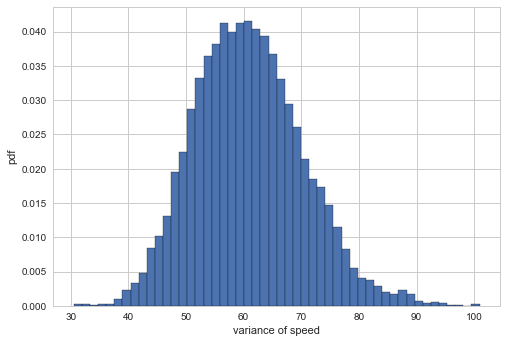

In [240]:
bs_replicates = draw_bs_reps(speed, np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("variance of speed")
_ = plt.ylabel("pdf")
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

In [241]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [ 44.14405  80.9295 ]


## Nonparametric inference

* Makes no assumptions about the model or probability distribution underlying the data. 

## Pairs bootstrap for linear regression

* Resample data in pairs. 
* Compute slope and intercept from resampled data.
* Each slope and intercept is a bootstrap replicate. 
* Compute confidence intervals from percentiles of bootstrap replicates. 

Because np.random.choice() takes in a 1D array, we're going to sample the indices now. 

In [242]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [243]:
len(total_votes)

3153

In [244]:
inds = np.arange(len(total_votes))

In [245]:
bs_inds = np.random.choice(inds, len(inds))

In [246]:
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

In [247]:
# compute a pairs bootstrap replicate

bs_slope, bs_intercept = np.polyfit(bs_total_votes, 
                                       bs_dem_share, 1)

In [248]:
bs_slope

3.7017108640030486e-05

In [249]:
bs_intercept

40.638204257820611

In [250]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([  3.37055369e-05,   4.08087905e+01])

Pretty close

In [251]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[ 0.04446053  0.0551738 ]


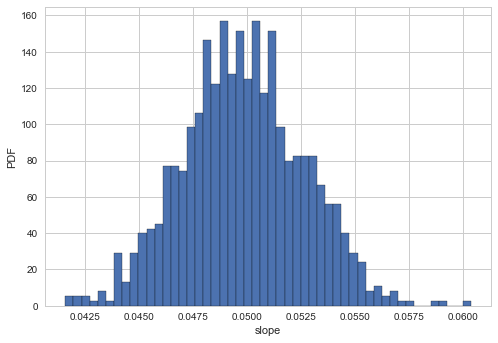

In [252]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size = 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. 

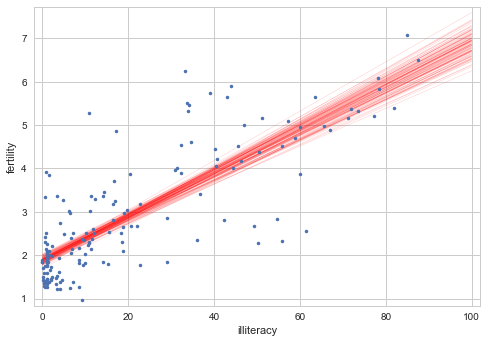

In [253]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Hypothesis testing

Now we kow how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake.

It is an assessment of how reasonable the observed data are assuming a hypothesis is true.

* Null hypothesis = another name for the hypothesis you are testing. 
* Permuatation = random ordering of entries in an array.


In [254]:
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [255]:
dem_share_PA = np.array(df_all_states[df_all_states["state"] == "PA"]["dem_share"])
dem_share_OH = np.array(df_all_states[df_all_states["state"] == "OH"]["dem_share"])

In [256]:
dem_share_PA

array([ 60.08,  40.64,  36.07,  41.21,  31.04,  43.78,  44.08,  46.85,
        44.71,  46.15,  63.1 ,  52.2 ,  43.18,  40.24,  39.92,  47.87,
        37.77,  40.11,  49.85,  48.61,  38.62,  54.25,  34.84,  47.75,
        43.82,  55.97,  58.23,  42.97,  42.38,  36.11,  37.53,  42.65,
        50.96,  47.43,  56.24,  45.6 ,  46.39,  35.22,  48.56,  32.97,
        57.88,  36.05,  37.72,  50.36,  32.12,  41.55,  54.66,  57.81,
        54.58,  32.88,  54.37,  40.45,  47.61,  60.49,  43.11,  27.32,
        44.03,  33.56,  37.26,  54.64,  43.12,  25.34,  49.79,  83.56,
        40.09,  60.81,  49.81])

In [257]:
dem_share_OH

array([ 56.94,  50.46,  65.99,  45.88,  42.23,  45.26,  57.01,  53.61,
        59.1 ,  61.48,  43.43,  44.69,  54.59,  48.36,  45.89,  48.62,
        43.92,  38.23,  28.79,  63.57,  38.07,  40.18,  43.05,  41.56,
        42.49,  36.06,  52.76,  46.07,  39.43,  39.26,  47.47,  27.92,
        38.01,  45.45,  29.07,  28.94,  51.28,  50.1 ,  39.84,  36.43,
        35.71,  31.47,  47.01,  40.1 ,  48.76,  31.56,  39.86,  45.31,
        35.47,  51.38,  46.33,  48.73,  41.77,  41.32,  48.46,  53.14,
        34.01,  54.74,  40.67,  38.96,  46.29,  38.25,   6.8 ,  31.75,
        46.33,  44.9 ,  33.57,  38.1 ,  39.67,  40.47,  49.44,  37.62,
        36.71,  46.73,  42.2 ,  53.16,  52.4 ,  58.36,  68.02,  38.53,
        34.58,  69.64,  60.5 ,  53.53,  36.54,  49.58,  41.97,  38.11])

In [258]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))

In [259]:
dem_share_both

array([ 60.08,  40.64,  36.07,  41.21,  31.04,  43.78,  44.08,  46.85,
        44.71,  46.15,  63.1 ,  52.2 ,  43.18,  40.24,  39.92,  47.87,
        37.77,  40.11,  49.85,  48.61,  38.62,  54.25,  34.84,  47.75,
        43.82,  55.97,  58.23,  42.97,  42.38,  36.11,  37.53,  42.65,
        50.96,  47.43,  56.24,  45.6 ,  46.39,  35.22,  48.56,  32.97,
        57.88,  36.05,  37.72,  50.36,  32.12,  41.55,  54.66,  57.81,
        54.58,  32.88,  54.37,  40.45,  47.61,  60.49,  43.11,  27.32,
        44.03,  33.56,  37.26,  54.64,  43.12,  25.34,  49.79,  83.56,
        40.09,  60.81,  49.81,  56.94,  50.46,  65.99,  45.88,  42.23,
        45.26,  57.01,  53.61,  59.1 ,  61.48,  43.43,  44.69,  54.59,
        48.36,  45.89,  48.62,  43.92,  38.23,  28.79,  63.57,  38.07,
        40.18,  43.05,  41.56,  42.49,  36.06,  52.76,  46.07,  39.43,
        39.26,  47.47,  27.92,  38.01,  45.45,  29.07,  28.94,  51.28,
        50.1 ,  39.84,  36.43,  35.71,  31.47,  47.01,  40.1 ,  48.76,
      

In [260]:
dem_share_perm = np.random.permutation(dem_share_both) # scramble the array
dem_share_perm

array([ 42.23,  47.87,  60.5 ,  36.11,  34.84,  44.69,  44.03,  29.07,
        45.45,  56.94,  43.18,  39.92,  61.48,  68.02,  45.6 ,  49.58,
        36.43,  43.82,  31.47,  54.74,  50.1 ,  48.76,  32.88,  44.08,
        46.15,  46.85,  40.45,  46.33,  31.04,  54.64,  39.67,  42.38,
        40.11,  49.79,  54.37,  46.33,  48.46,  41.55,  49.44,  36.05,
        42.97,  52.76,  27.92,  44.71,  38.62,  41.77,  60.08,  37.77,
        57.88,  27.32,  48.36,  53.61,  57.81,  33.57,  49.81,  35.71,
        46.73,  46.07,  83.56,  44.9 ,  39.43,  31.56,  47.75,  63.1 ,
        48.61,  45.26,  37.72,  48.62,  46.29,  42.65,  38.96,  36.54,
        39.26,  42.2 ,  47.43,  36.71,  59.1 ,  39.86,  50.46,  60.49,
        49.85,  28.94,  40.1 ,  43.43,  36.07,  39.84,  45.88,  37.53,
        37.62,  41.21,  51.38,  60.81,  40.24,  41.56,  54.25,  38.07,
        53.16,  32.97,  28.79,  52.4 ,  43.12,  38.53,  47.47,  34.58,
        65.99,  56.24,  50.36,  38.1 ,  69.64,  54.59,  36.06,  43.11,
      

In [261]:
# assign the first 67 to be PA and the rest to be OH
# these samples are called permutation samples

perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions.

In [262]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

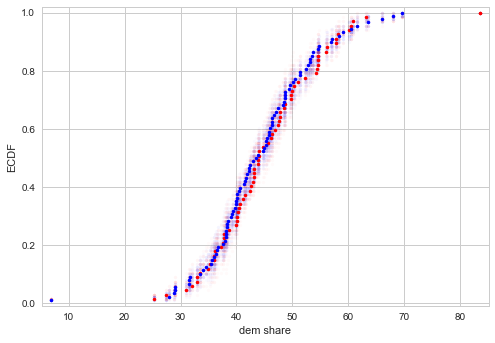

In [263]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(dem_share_PA, dem_share_OH)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2 , marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(dem_share_PA)
x_2, y_2 = ecdf(dem_share_OH)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('dem share')
_ = plt.ylabel('ECDF')
plt.show()

Notice the permutation samples ECDFs overlap and give a purple haze. The ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is commensurate with the data. 

Are OH and PA different? Hypothesis testing is an assessment of how reasonable the observed data are assuming a hypothesis is true. But what about the data do we assess and how do we quantify the assessment? The answer hinges on a test statistic. 

## Test statistic

* A single number that can be computed from observed data and from data you simulate under the null hypothesis, 
* It serves as a basis of comparison between the two. 

Question: Are the 2 states different? If they are identical, they should have the same mean vote share for Obama. So the difference in mean vote share should be zero. Therefore, we will choose the difference in mean as our test statistic. 

In [264]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

1.2591858887381235

The test statistic for the permutations is 1.25% (permutation replicate). 

In [265]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # original data

1.1582360922659447

## P-value

* The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. 

* It is NOT the probability that the null hypothesis is true. 

### Statistical significance

* Determined by the smallness of a p-value. 

### Statistical Significance != Practical Significance

In [266]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data.

In [267]:
frog = pd.read_csv("datasets/st2/frog_tongue.csv")
frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


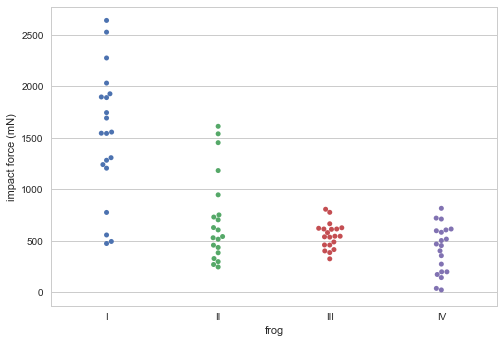

In [268]:
# Make bee swarm plot
_ = sns.swarmplot(x = "ID", y = "impact force (mN)", data = frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN)')

# Show the plot
plt.show()


Eyeballing it, it does not look like they come from the same distribution. However, it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

In [269]:
force_a = np.array(frog[frog["ID"] == "III"]["impact force (mN)"])
force_a

array([614, 414, 324, 776, 611, 544, 538, 579, 806, 459, 458, 626, 621,
       544, 535, 385, 401, 614, 665, 488], dtype=int64)

In [270]:
force_b = np.array(frog[frog["ID"] == "IV"]["impact force (mN)"])
force_b

array([172, 142,  37, 453, 355,  22, 502, 273, 720, 582, 198, 198, 597,
       516, 815, 402, 605, 711, 614, 468], dtype=int64)

In [271]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [272]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
print(empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

131.0
p-value = 0.0165


The p-value tells you that there is about a 1.5% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", 

but...

#### warning! warning! warning! 

You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## Pipeline for hypothesis testing

* Clearly state the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothesis is true
* Compute the test statistic for each simulated dataset
* The p-value is the fraction of your simulated datasets for which the test statistic is at least as extreme as for the real data. 

#### Null hypothesis: The true mean speed of light in Michelson's experiments was actually Newcomb's reported value. 

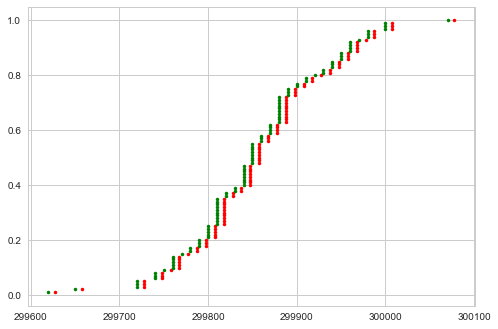

In [273]:
newcomb_value = 299860 # km/s

# shift michelson's data such that its mean matches newcomb's value
michelson_shifted = speed - np.mean(speed) + newcomb_value 

x, y = ecdf(michelson_shifted)
x2, y2 = ecdf(speed)

_ = plt.plot(x, y, marker = ".", linestyle = "none", color = "red")
_ = plt.plot(x2, y2,  marker = ".", linestyle = "none", color = "green")
plt.show()

We can then use bootstrapping to simulate data acquisition under the null hypothesis. 

In [274]:
# calculating the test statistic

def diff_from_newcomb(data, newcomb_value = 299860):
    return np.mean(data) - newcomb_value

diff_obs = diff_from_newcomb(speed)
print(diff_obs)

-7.599999999976717


In [275]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)

In [276]:
p_value = np.sum(bs_replicates <= diff_obs) / 10000
# in this case, we use <= because the mean from michelson's experiment was less than newcomb's value.  

print("p_value:", p_value)

p_value: 0.1635


Cannot reject the null hypothesis. This suggests that Newcomb and Michelson did not have fundamental differences in their measurements. This is an example of a one sample test. 

## One sample test
* Compare one set of data to a single number

## Two sample test
* Compare two sets of data

### A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 555 mN. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true.

In [277]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 555

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0037


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

## A bootstrap test for identical distributions

We looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. 

 To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is less than what was observed.

Perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

In [278]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
print("empirical_diff_means =", empirical_diff_means)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)


empirical_diff_means = 131.0
p-value = 0.0166


Reject the null hypothesis that frog A and B have identical distributions of impact forces. 

## A two-sample bootstrap hypothesis test for difference of means.
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [279]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size = 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean , size = 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= (np.mean(force_a) - np.mean(force_b))) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0119


Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces?

You need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value.

## A/B testing



- Used by organizations to see if a strategy change gives a better result. You want to see if the clickthrough-rate change is due to random chance. 
- The null hypothessis is that the test statistic is impervious to the change (aka no change).
- A low p-value implies a change in performance. 
- Keep in mind that statistical significance may not equal to practical significance. A difference in click-through rate may be statisically significant but if it's only a couple people per day, the marketing team may not consider the change to be worth the cost. 
- A/B testing is a special case of hypothesis testing. 

In [280]:
clickthrough_A = (np.random.rand(1000) > 0.3).astype(int)
clickthrough_B = (np.random.rand(1000) > 0.1).astype(int)

In [281]:
clickthrough_A[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [282]:
sum(clickthrough_A)

719

In [283]:
clickthrough_B[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [284]:
sum(clickthrough_B)

894

In [285]:
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B) 
    return frac_B - frac_A

In [286]:
diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)

diff_frac_obs

0.17500000000000004

In [287]:
perm_replicates = np.empty(10000)

In [288]:
for i in range(10000):
    perm_replicates[i] = draw_perm_reps(
        clickthrough_A, clickthrough_B, diff_frac)

In [289]:
perm_replicates

array([ 0.001,  0.001, -0.005, ..., -0.007, -0.007, -0.001])

In [290]:
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000

p_value

0.0

### A/B Testing: The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yay. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yay.

In [291]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/(153+91)) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

### MLB No Hitter A/B Testing

In [292]:
nht_dead = [ -1, 894, 10, 130, 1, 934, 29, 6, 485, 254, 372, 81, 191, 355, 180, 286, 47, 269, 361, 173, 246, 492, 462, 1319, 58, 297, 31, 2970, 640, 237, 434, 570, 77, 271, 563, 3365, 89, 0, 379, 221, 479, 367, 628, 843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887]

len(nht_dead)

91

In [293]:
nht_live = [ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467]

len(nht_live)

203

In [294]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

print("nht_diff_obs:", nht_diff_obs)

nht_diff_obs: -345.001136794


In [295]:
# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size = 10000)

print(len(perm_replicates))

10000


In [296]:
perm_replicates[0:100]

array([-150.04092459,  -44.2690413 ,    2.02804092,   58.62220538,
        203.48162183,   35.60894278,   42.78666161,   41.57711254,
       -159.38309966,    7.04130352, -129.65365669,    7.21636984,
        161.57711254,   53.60894278,  -85.69609701,  102.67525578,
        -36.69344449,  -63.20803335,  -92.98522167, -154.95869648,
          6.88215233,   55.98029557,   28.70178098,  -24.7889352 ,
        -34.59264873,   77.65668814, -287.8021978 ,   97.96438045,
        142.39939371,    0.56384994,   57.74687382,   58.49488443,
        -62.73057977,  -23.84994316,   89.64077302,  -81.39901478,
         54.038651  ,  119.35430087,   89.09965896, -156.10458507,
          4.43122395, -231.17620311,  -28.13111027,  -94.25843122,
         22.31981811,   -6.59795377,  -67.96665404,  252.08639636,
       -163.99848427,  247.28003031,  -50.73057977,   49.43918151,
        149.73626374,    1.56650246,   89.41796135,   -4.21068587,
        -29.83402804,   82.00151573,   26.69647594,   85.15270

In [297]:
# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)

print('p-value:',p)

p-value: 0.0


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

#### EDA First

It's a good idea to plot the ECDFs first. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true. The data sets, nht_dead and nht_live, along with ecdf() and the usual imports.

## Hypothesis test of correlation

* Null hypothesis: the two variables are completely uncorrelated.
* Simulate data assuming null hypothesis is true.
* Use the Pearson correlation as the test statistic.
* Compute the p-value as a fraction of replicates that have the Pearson correlation at least as large as observed. 

### Simulating a null hypothesis concerning correlation
The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled. 

This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [298]:
illiteracy = [  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9]

len(illiteracy)

162

In [299]:
fertility = [  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9]

len(fertility)

162

In [300]:
# number of replicates
n = 10000

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(n)

# Draw replicates
for i in range(n):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

## Do neonicotinoid insecticides have unintended consequences?

You will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

In [305]:
control = [  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ]

len(control)

145

In [306]:
treated = [ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696]

len(treated)

90

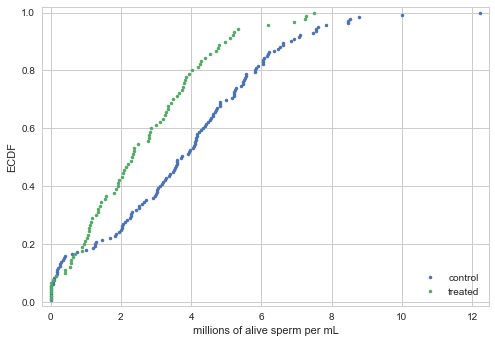

In [307]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm.

### Bootstrap hypothesis test on bee sperm counts

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [317]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets for both control and treated such that the shifted data sets have the same mean.
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
                       
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
            
print('p-value =', p)

p-value = 0.0


 The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.